# Point estimates

We are trying to reveal some parameter of unknown distribution that we sample from. 
In this problem we are sampling from distribution $U(0,\theta)$. 
To imagine a story about this: we play a game where the amount of time we get to play is random, 
generated by a device set up to generate a uniform random variable from interval $[0,\theta]$ for some 
value of $\theta$. How to decide the value of $\theta$ from several observations? 

A discrete version of this is the "German tank problem". 
https://en.wikipedia.org/wiki/German_tank_problem

In [165]:
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The next function generates num numbers from the distribution $U(0,secretmax)$.

In [181]:
def sampleU(sample_size, secretmax):
    """
        Returns a sample of num independent values from U(0,secretmax).
    """
    return stats.uniform.rvs(loc=0,scale=secretmax,size=sample_size)

We present few variants of estimate. 

The first one is obtained by the moment method, the second by the maximum likelihood.

(Can you find a better one? The best possible solution is not yet discovered.)

In [166]:
def my_estimate(x):
    return 2*x.mean()

In [167]:
def my_estimate2(x):
    return x.max()

In [168]:
def my_estimate3(x):
    n = len(x)
    return x.max()*(n+1)/n

Now: how to test which estimate is better? 

We compute the bias and the mean squared error.

Observe the results and think about what it means.

In [210]:
def test_my_method(secret, sample_method, estimate_method, sample_size=5, num=10**4, image=True, eps=0.1):
    if secret is None: secret  = 130
    L = []
    D = []
    for _ in range(num):
        data = sample_method(sample_size,secret)   # one experiment -- perform sample_size measurements, predict what it implies
        D.append(data)
        L.append(estimate_method(data))

    estimates = np.array(L)
    MSE = np.mean((estimates-secret)**2)
    bias = estimates.mean()-secret
    p = np.mean(abs(estimates-secret)>eps)
    
    print(f"Mean: {estimates.mean():.3f}")
    print(f"Bias: {bias:.3f}")

    print(f"Mean squared error: {MSE:.3f}")
    print(f"Var+Bias^2: {estimates.var()+bias**2:.3f}, ")    
    print(f"P(error > {eps}) = {p}")
    
    if image:
        sns.set_style('whitegrid')
        sns.histplot(estimates)

Mean: 129.905
Bias: -0.095
Mean squared error: 55.302
Var+Bias^2: 55.302, 
P(error > 5) = 0.4987


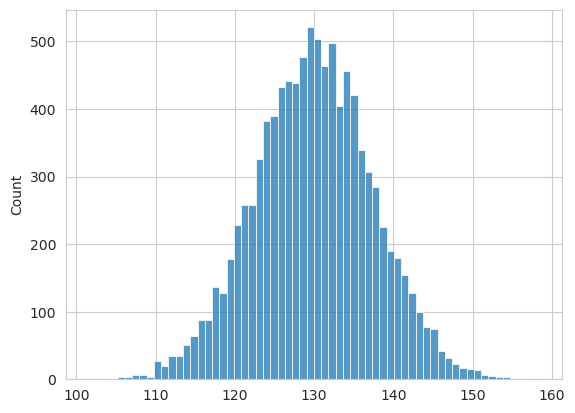

In [236]:
test_my_method(130, sampleU, my_estimate, sample_size=100, num=10000, eps=5)

In [218]:
test_my_method(130, sampleU, my_estimate, sample_size=5, num=10**3, image=False, eps=10); print()
test_my_method(130, sampleU, my_estimate, sample_size=50, num=10**3, image=False, eps=10); print()
test_my_method(130, sampleU, my_estimate, sample_size=500, num=10**3, image=False, eps=10)

Mean: 130.721
Bias: 0.721
Mean squared error: 1168.402
Var+Bias^2: 1168.402, 
P(error > 10) = 0.776

Mean: 129.917
Bias: -0.083
Mean squared error: 109.815
Var+Bias^2: 109.815, 
P(error > 10) = 0.343

Mean: 130.169
Bias: 0.169
Mean squared error: 11.394
Var+Bias^2: 11.394, 
P(error > 10) = 0.006


Mean: 128.721
Bias: -1.279
Mean squared error: 3.296
Var+Bias^2: 3.296, 
P(error > 5) = 0.0204


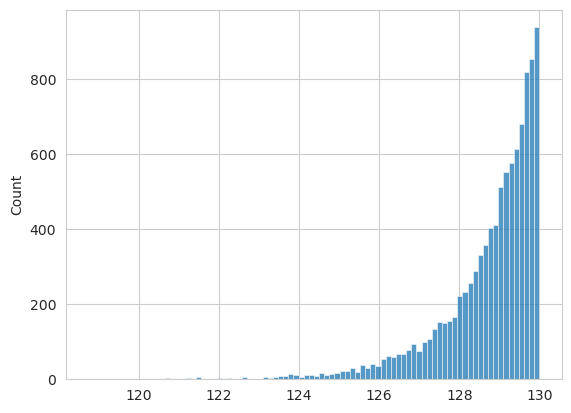

In [237]:
test_my_method(130, sampleU, my_estimate2, sample_size=100, num=10000, eps=5)

Mean: 130.011
Bias: 0.011
Mean squared error: 1.673
Var+Bias^2: 1.673, 
P(error > 5) = 0.0076


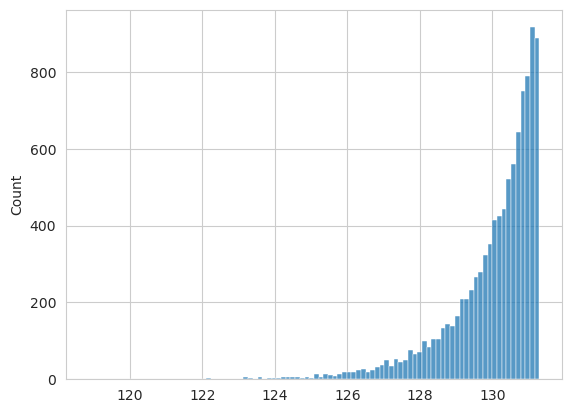

In [238]:
test_my_method(130, sampleU, my_estimate3, sample_size=100, num=10000, eps=5)

In [140]:
def sampleGeom(num, secretp):
    """
        Returns a sample of num independent values from Geom(secretp).
    """
    return stats.geom.rvs(secretp,size=num)

In [208]:
def sampleExp(num, secretp):
    """
        Returns a sample of num independent values from Geom(secretp).
    """
    return stats.expon.rvs(secretp,size=num)

In [194]:
def my_estimate4(x):
    return 1/x.mean()

In [206]:
def my_estimate5(x):
    return x.mean()

Mean: 0.170
Bias: 0.003
Mean squared error: 0.001
Var+Bias^2: 0.001, 
P(error > 0.05) = 0.0261


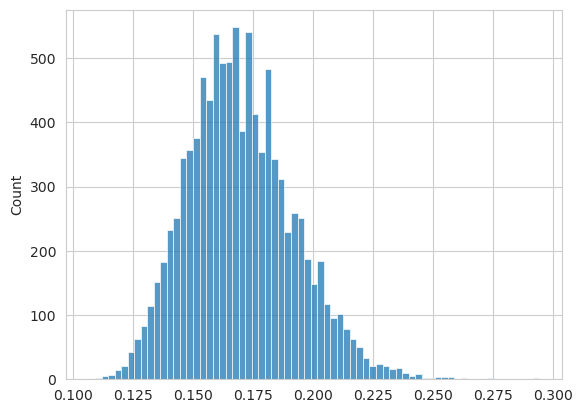

In [222]:
test_my_method(1/6, sampleGeom, my_estimate4, sample_size=50, num=10000, eps=0.05)

Mean: 0.169
Bias: 0.003
Mean squared error: 0.000
Var+Bias^2: 0.000, 
P(error > 0.05) = 0.0292


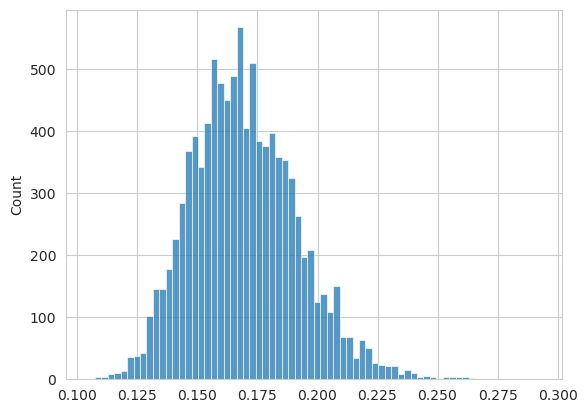

In [223]:
test_my_method(1/6, sampleGeom, my_estimate4, sample_size=50, num=10000, eps=0.05)

Mean: 3.992
Bias: 0.992
Mean squared error: 1.182
Var+Bias^2: 1.182, 
P(error > 0.05) = 1.0


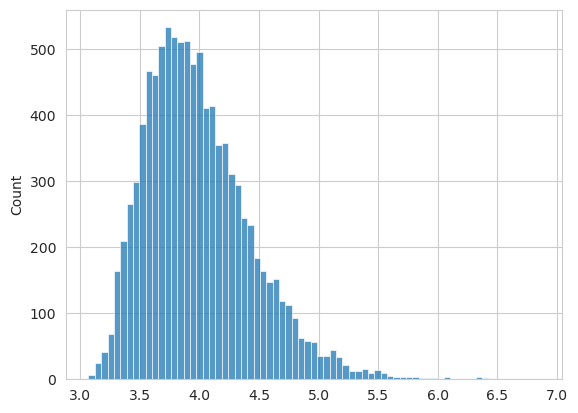

In [224]:
test_my_method(3, sampleExp, my_estimate5, sample_size=5, num=10000, eps=0.05)